<a href="https://colab.research.google.com/github/databyhuseyn/DataAnalysis/blob/main/employee_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data from an Excel file
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (3).xls')

# Display all columns
pd.set_option('display.max_columns',None) # Used to display the all features
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


In [4]:
# Check for missing values

data.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [5]:
# Explore the 'Age' column

data['Age'].describe()

count    1200.000000
mean       36.918333
std         9.087289
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [6]:
# Create age categories and add a new column 'AgeCategory'

bins = [20,40,60, float('inf')]
labels = ['20-40','40-60','60+']
data['AgeCategory'] = pd.cut(data['Age'], bins= bins, labels = labels)
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,AgeCategory
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3,20-40
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3,40-60
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4,20-40
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3,40-60
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4,20-40
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3,20-40
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3,40-60
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3,20-40


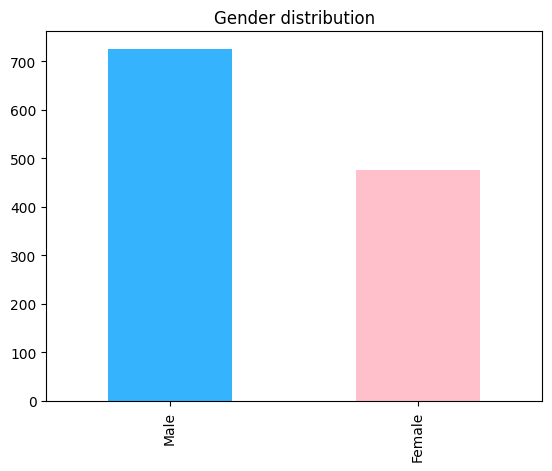

In [7]:
# Plot gender distribution

data['Gender'].value_counts().plot(kind='bar', title = 'Gender distribution', color=(['#35B4FD','pink']));

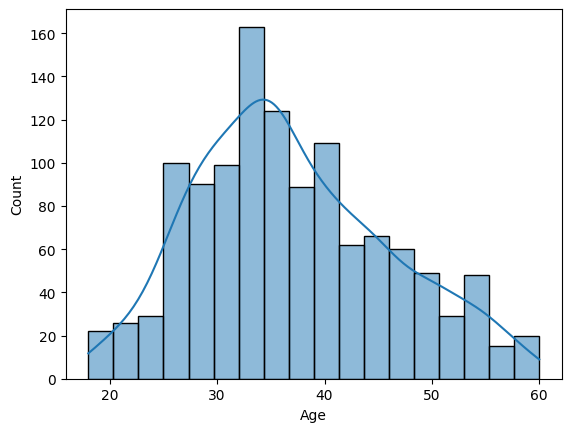

In [8]:
# Plot a histogram for the 'Age' column with KDE

sns.histplot(data, x= 'Age', kde = True);

In [9]:
# Calculate correlation matrix

heat = data.corr(method = 'pearson')

<ipython-input-9-3f7e9d2ba1b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = data.corr(method = 'pearson')


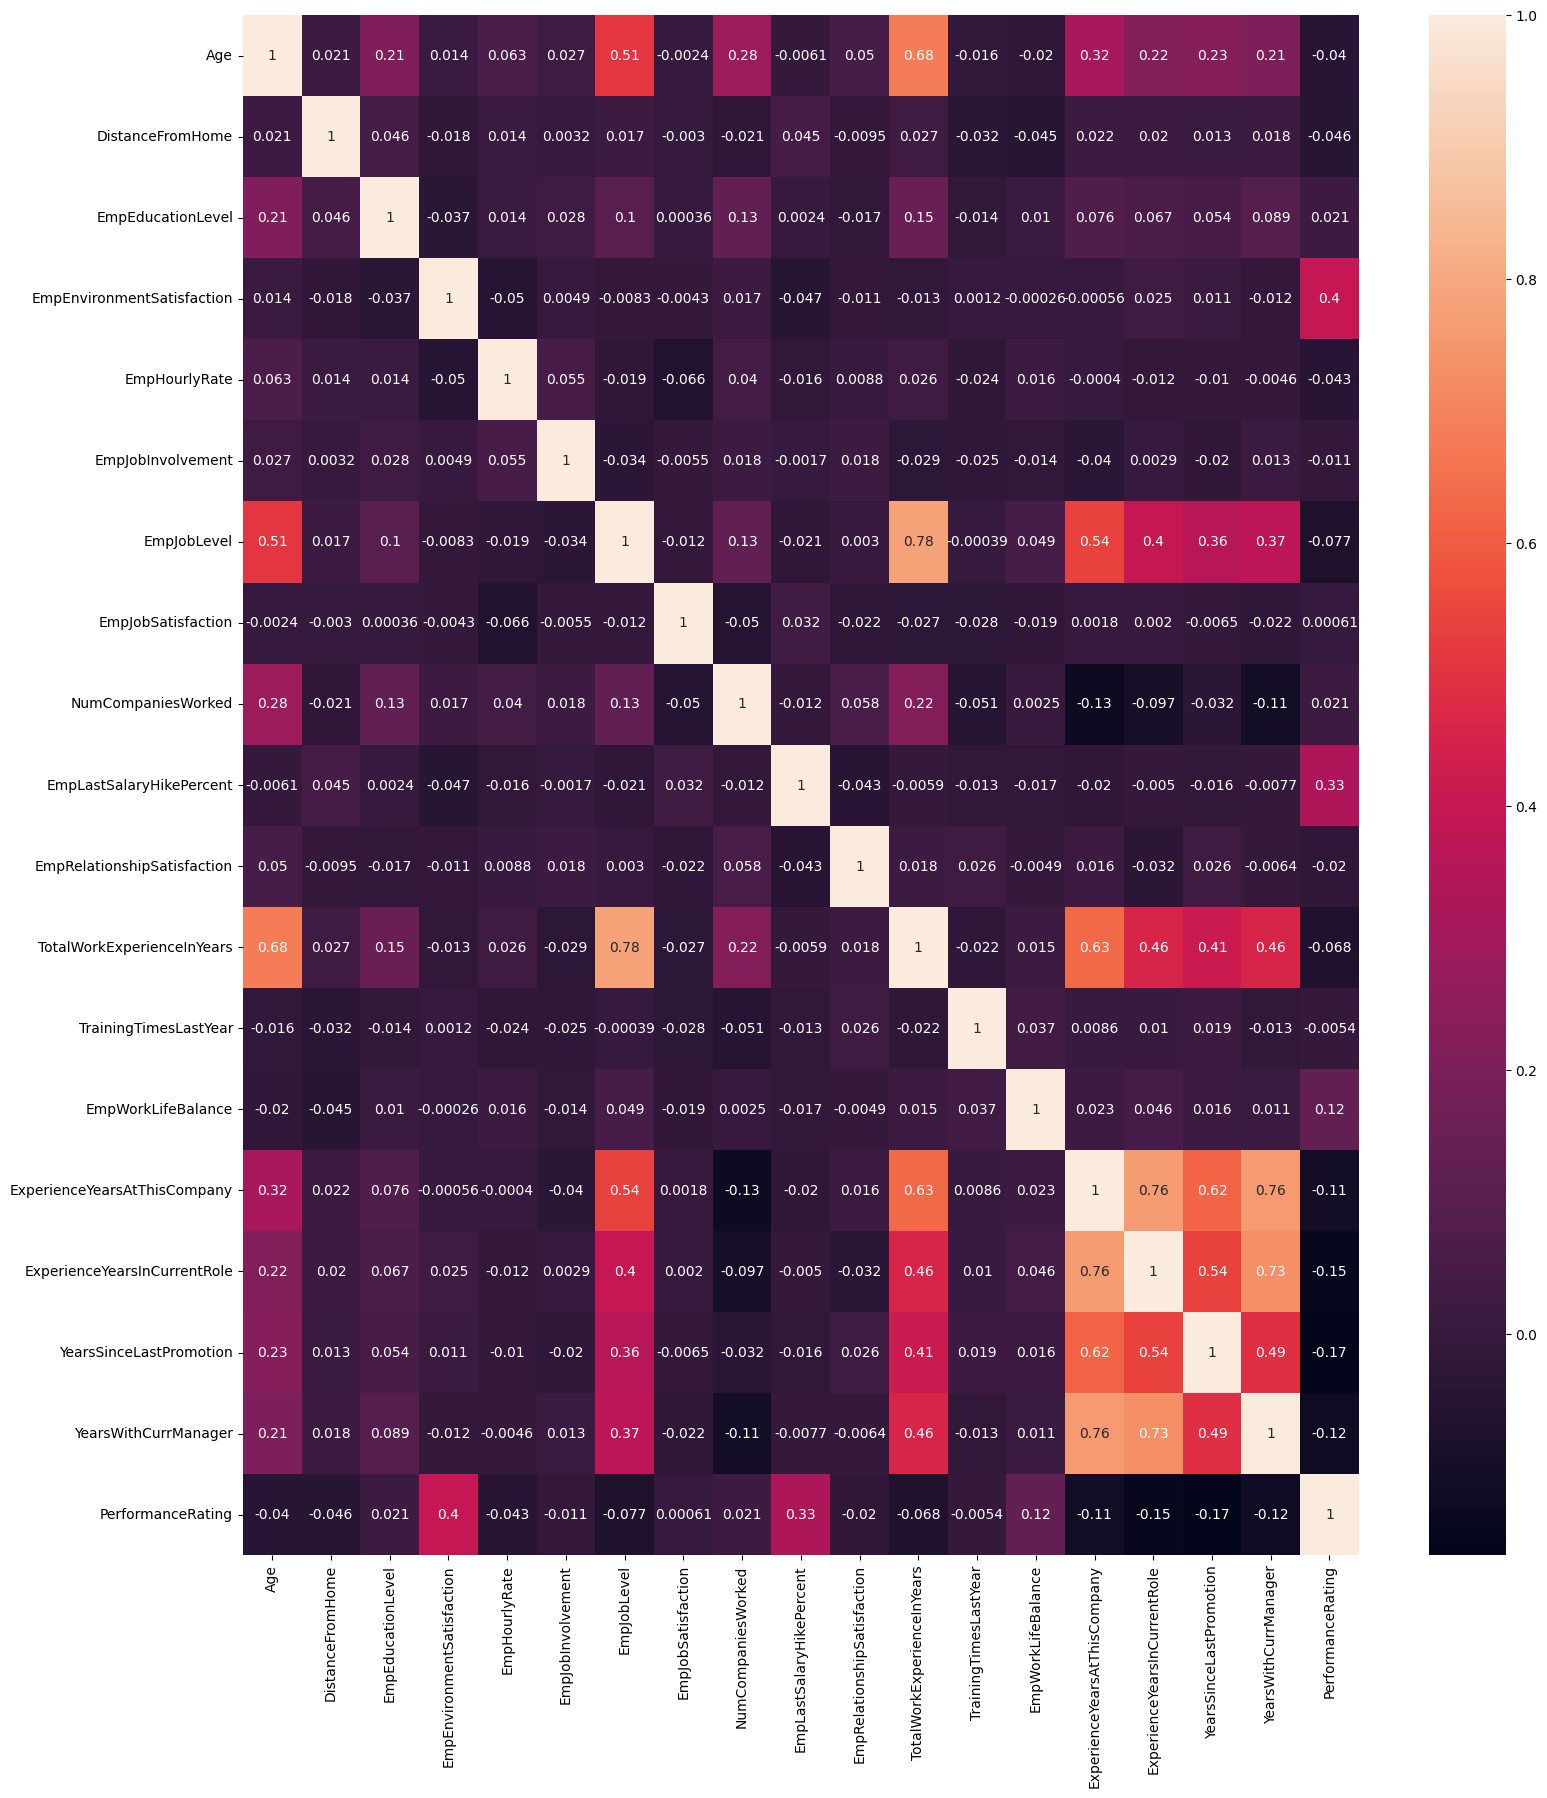

In [13]:
# Plot a heatmap for the correlation matrix

plt.figure(figsize=(18, 20))
heatmap = sns.heatmap(heat, annot = True);   #aspect = 10/7

In [11]:
# Calculate and display the percentage of PerformanceRating in each EmpDepartment

percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"])
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales
PerformanceRating,,,,,,
2,100,1300,1500,1000,6800,8700
3,1700,30400,3000,3800,23400,25100
4,200,4400,400,600,4100,3500


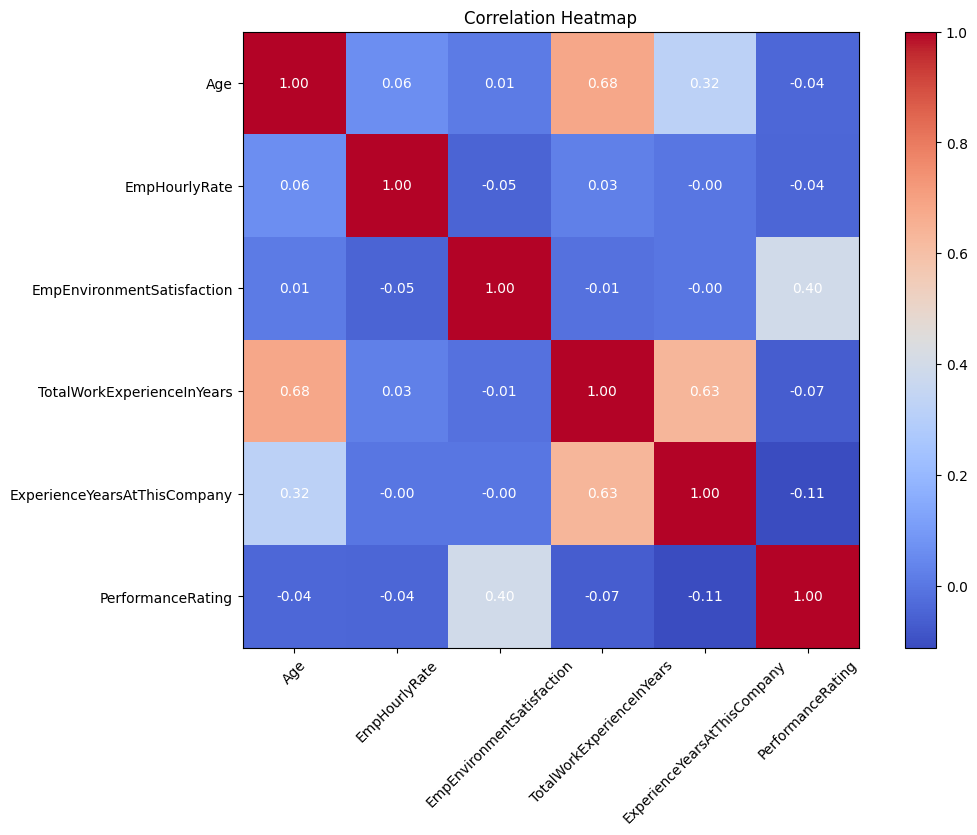

In [12]:
# Select numerical columns for correlation matrix

import numpy as np

numerical_cols = ['Age', 'EmpHourlyRate', 'EmpEnvironmentSatisfaction', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'PerformanceRating']
numerical_data = data[numerical_cols]

# Plot a correlation heatmap for numerical columns

plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

plt.xticks(np.arange(len(numerical_cols)), numerical_cols, rotation=45, fontsize=10)
plt.yticks(np.arange(len(numerical_cols)), numerical_cols, fontsize=10)

# Add annotations to the correlation heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.title('Correlation Heatmap')
plt.show()
